In [15]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run utils.py

In [3]:
%%time

image_size = 32
frame_duration = 1.0
overlap = 0
X, y = make_data_pipeline(file_names, labels, image_size, frame_duration, overlap)
X.shape, y.shape

CPU times: user 17.1 s, sys: 2.53 s, total: 19.7 s
Wall time: 15.1 s


((1821, 32, 32, 3), (1821,))

In [7]:
average_map = np.mean(X, axis=0)
max_map = np.max(X, axis=0)
average_map.shape, max_map.shape

((32, 32, 3), (32, 32, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


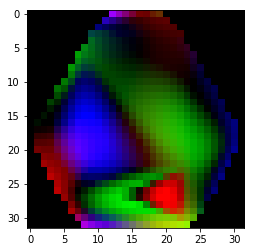

In [9]:
plt.imshow(average_map)

In [23]:
np.max(average_map), np.min(average_map)

(1.1819830761258108, -1.3349173489512975)

In [10]:
def array_to_datalist(array, channel_names):
    datalist = []

    n_rows, n_cols, n_channels = array.shape    
    for i_row in range(n_rows):
        for j_col in range(n_cols):
            channel_data = array[i_row, j_col]
            datapoint = {"row": i_row,
                         "column": j_col
                        }
            for channel_value, channel_name in zip(channel_data, channel_names):
                datapoint[channel_name] = channel_value
                
            datalist.append(datapoint)
            
    return datalist

In [11]:
freq_bands = ["theta", "beta", "alpha"]

In [13]:
average_map_datalist = array_to_datalist(average_map, freq_bands)
len(average_map_datalist)

1024

In [14]:
average_map_datalist

[{'alpha': 0.0, 'beta': 0.0, 'column': 0, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 1, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 2, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 3, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 4, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 5, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 6, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 7, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 8, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 9, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 10, 'row': 0, 'theta': 0.0},
 {'alpha': 0.0, 'beta': 0.0, 'column': 11, 'row': 0, 'theta': 0.0},
 {'alpha': 1.0026588512795533,
  'beta': -0.9363870033986967,
  'column': 12,
  'row': 0,
  'theta': 0.6120782056014707},
 {'alpha': 0.7318337312002668,
  'beta': -0.7216138210620269,
  'column'

In [26]:
json_obj = {
    "rows": image_size,
    "columns": image_size,
    "bands": freq_bands,
    "averageActivity": average_map_datalist,
}

In [27]:
with open("../proyecto-insideout/data/brain-activity.json", "w") as f:
    json.dump(json_obj, f)